## Tanzania -Water -Wells -Project

## Overview

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

We are going to build a classifier to predict the condition of a water well, using
historical data about well features, such as location, pump type, and installation year, we aim to classify wells into one of three categories: functional, functional but in need of repair, or non-functional.This classification can aid NGOs and the Tanzanian government in identifying wells that require maintenance or replacement, improving water accessibility.

To achieve this, we will build a machine learning model that leverages the available features to predict the condition of the wells. By following the full data science process, from data preprocessing to model evaluation, we will iteratively refine the model to improve its accuracy. Ultimately, this project will provide actionable insights for resource allocation, ensuring that the wells in most critical need are prioritized for maintenance or replacement.

## Business Understanding

Access to clean water is a critical issue in Tanzania, where many rural communities rely on water wells for their daily needs. However, due to factors such as poor maintenance, aging infrastructure, and environmental challenges, many of these wells are either non-functional or in need of repair. The inability to efficiently identify and prioritize well maintenance leads to wasted resources and prolonged water scarcity. The goal of this project is to provide stakeholders, such as NGOs and the Tanzanian government, with a predictive tool to assess the condition of water wells and optimize the allocation of resources for repairs and new well installations.

By leveraging historical data on well characteristics such as the type of pump, the year of installation, and geographic location, we aim to build a classification model that can predict the operational status of wells. The insights generated by the model will help organizations focus on the most urgent repairs, prevent future breakdowns, and make data-driven decisions on where to invest in new infrastructure. This project addresses a vital business problem by providing a sustainable solution to water management in Tanzania.

## Data Understanding

#### Data Source

The data for this project comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water. The Ministry of Water describes Taarifa as such "Taarifa is an open source platform for the crowd sourced reporting and triaging of infrastructure related issues. Think of it as a bug tracker for the real world which helps to engage citizens with their local government. We are currently working on an Innovation Project in Tanzania, with various partners."

The Taarifa homepage can be found by following this link: https://taarifa.org/

To solve  classification problem with the Tanzanian Water Wells dataset, we'll primarily work with both Training set values and Training set labels to build and train your model.
1.	Training Set Values:
- This dataset contains the independent variables (features) that describe each water well. These features will be used to predict the well's condition.

2.	Training Set Labels:

-	This dataset contains the dependent variable (target), which is the condition of each well. The column you will focus on is typically labeled as status_group, with categories such as "functional," "functional but needs repair," and "non-functional." This is our target for classification.


#### Common Columns in the Tanzania Water Wells Dataset:

id: A unique identifier for each well.

amount_tsh: The total static head (amount of water) in the well in liters.

date_recorded: The date the information was recorded.

funder: Who funded the well.

gps_height: Altitude of the well.

installer: Who installed the well.

longitude: Longitude of the well's location.

latitude: Latitude of the well's location.

wpt_name: The name of the waterpoint.

basin: The basin where the well is located.

subvillage: The sub-village where the well is located.

region: The region where the well is located.

district_code: The district code for the well's location.

lga: The local government area for the well.

ward: The ward where the well is located.

population: The population around the well.

public_meeting: Boolean indicating if there was a public meeting.

recorded_by: Who recorded the data (almost always 'Government').

scheme_management: Who operates the waterpoint.

scheme_name: The name of the water scheme.

permit: Boolean indicating whether the well has a permit.

construction_year: The year the well was constructed.

extraction_type: The type of extraction method used.

extraction_type_group: Grouped type of extraction method.

extraction_type_class: Class of extraction method.

management: Who manages the well.

management_group: Group of management.

payment: The type of payment system used.

payment_type: Type of payment.

water_quality: The quality of water at the well.

quality_group: Grouped quality of water.

quantity: The quantity of water.

quantity_group: Grouped quantity of water.

source: The source of water.

source_type: The type of water source.

source_class: The class of water source.

waterpoint_type: The type of waterpoint.

waterpoint_type_group: Grouped type of waterpoint.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
# Load the datasets
train_values = pd.read_csv('Data/training_set_values.csv')
train_labels = pd.read_csv('Data/training_set_labels.csv')


In [3]:
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
# Merge the features with the target labels
data = pd.merge(train_values, train_labels, on='id')
# Display the first few rows of the dataset
print(data.head())

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity  quantity_grou

In [6]:
# Get a summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per feature:\n", missing_values[missing_values > 0])

Missing values per feature:
 funder                3637
installer             3655
wpt_name                 2
subvillage             371
public_meeting        3334
scheme_management     3878
scheme_name          28810
permit                3056
dtype: int64


#### Feature Engineering

In [8]:
#Time-based Features

# Convert date_recorded to datetime
#data['date_recorded'] = pd.to_datetime(data['date_recorded'])

# Extracting year, month from date_recorded
#data['recorded_year'] = data['date_recorded'].dt.year
#data['recorded_month'] = data['date_recorded'].dt.month

# Create a new feature for the number of years since installation
#data['years_since_installation'] = data['recorded_year'] - data['construction_year']
#data['years_since_installation'].replace({0: 1}, inplace=True)  # To avoid 0 in case of new construction


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


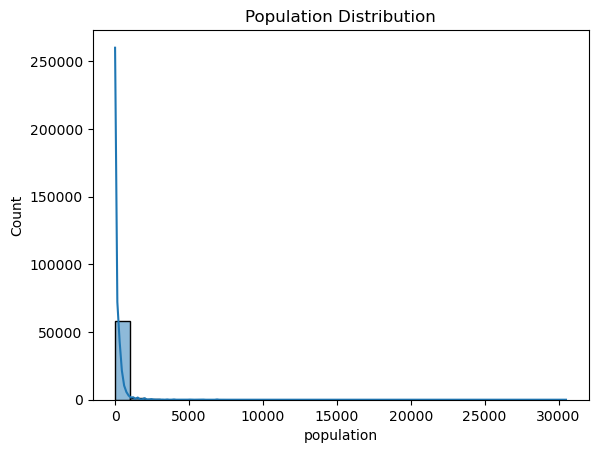

In [9]:
# Distribution of population
sns.histplot(data['population'], bins=(30), kde=True)
plt.title('Population Distribution')
plt.show()

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


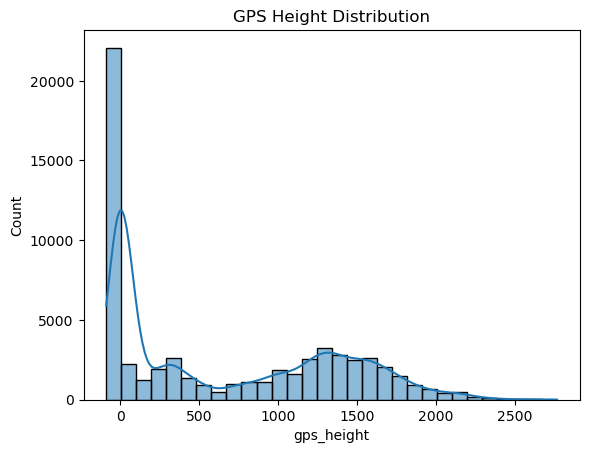

In [10]:
# Distribution of gps_height
sns.histplot(data['gps_height'], bins=30, kde=True)
plt.title('GPS Height Distribution')
plt.show()

Display a correlation heatmap to analyze relationships between numeric features

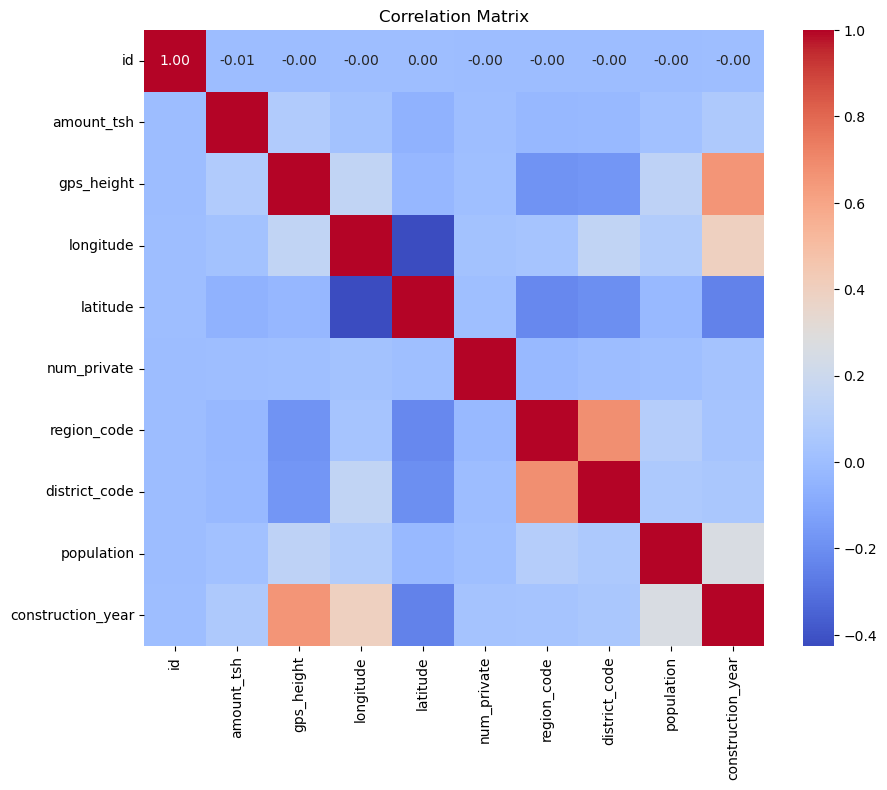

In [11]:
# Selecting numeric columns for correlation matrix
numeric_features = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_features.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [12]:
import folium

 #Create a map centered around Tanzania
m = folium.Map(location=[-6.369028, 34.888822], zoom_start=6)

# Plot each well on the map
for index, row in data.iterrows():
    color = 'green' if row['status_group'] == 'functional' else 'orange' if row['status_group'] == 'functional needs repair' else 'red'
    folium.CircleMarker([row['latitude'], row['longitude']], radius=2, color=color).add_to(m)

m.save('well_status_map.html')



#### Findings from the map

This map illustrates the distribution of water wells across Tanzania, differentiated by their functionality status. Green dots  represent functional wells, red dots represent non-functional wells, and orange dots indicate wells that require repair or maintenance. 

From the map, it is clear that well distribution is extensive, covering most regions of the country. However, a significant portion of the wells appear to be non-functional, particularly in central and western regions. Areas near major lakes and cities also exhibit a higher concentration of wells, though non-functionality seems to be widespread across rural areas as well. 

In [13]:
# Check the distribution of the target variable
print("Target variable distribution:\n", data['status_group'].value_counts())

Target variable distribution:
 status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64


Checking the distribution of the target variable (status_group) is essential for understanding if the classes are balanced or imbalanced, which can affect model training.

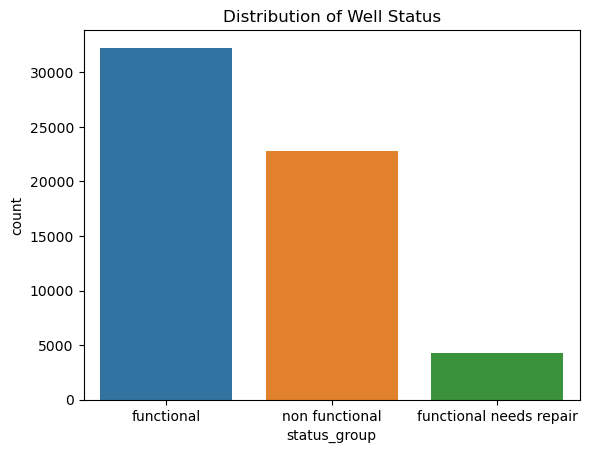

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='status_group', data=train_labels)
plt.title('Distribution of Well Status')
plt.show()

## Data Preparation

In [15]:
# Handling missing values - drop rows or features with missing data 
data = data.dropna()  

#### Encoding Categorical Features

We apply LabelEncoder to categorical features. If the model you choose later works better with one-hot encoding, we can adjust this approach accordingly.


In [16]:
# Encoding categorical features using LabelEncoder for simplicity (can use OneHotEncoder for some models)
categorical_columns = data.select_dtypes(include=['object']).columns

In [17]:
# Apply LabelEncoder to all categorical features
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

#### Train-Test Split

The data is split into training and testing sets. We use a 70/30 split to reserve some data for testing after the model is trained.

In [18]:
# Split data into features (X) and target (y)
X = data.drop(columns=['status_group', 'id'])
y = data['status_group']

In [19]:
# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Future scaling

We scale the features using StandardScaler. Scaling ensures that features with different units and ranges don’t dominate the model training (especially important for models sensitive to feature magnitude).


In [20]:
# Feature scaling (optional - not required for all models, but important for models like logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Display the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (19019, 39)
Test data shape: (8152, 39)


## Modeling


#### Training Baseline Models:

We train two baseline models: Logistic Regression (scaled data) and Decision Tree (unscaled data).

In [22]:
# Baseline model: Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
# Baseline model: Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)  # No scaling needed for decision trees

DecisionTreeClassifier(random_state=42)

#### Feature importance for Decision Tree

This is to help stakeholders understand which features are driving  the model predictions.

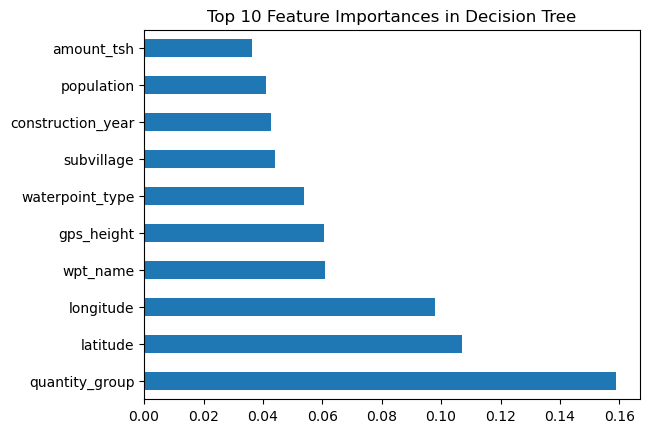

In [24]:
feature_importances = pd.Series(decision_tree_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances in Decision Tree')
plt.show()

## Evaluation

#### Model Predictions

We make predictions on the test set for both models.

In [25]:
# Make predictions on the test set using both models
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
y_pred_tree = decision_tree_model.predict(X_test)

#### Performance Metrics:

Accuracy: The proportion of correctly classified instances over the total instances.

Precision: The proportion of true positive predictions among all positive predictions.

Recall: The proportion of true positive predictions among all actual positives.

F1-score: The harmonic mean of precision and recall, offering a balance between them.

Confusion Matrix: Shows the number of correct and incorrect predictions for each class.

Classification Report: Provides precision, recall, and F1-score for each class.


In [26]:
# Evaluate the Logistic Regression model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_log_reg, average='weighted'):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Model Performance:
Accuracy: 0.6743
Precision: 0.6413
Recall: 0.6743
F1-score: 0.6435

Confusion Matrix:
[[3978    4  729]
 [ 480    9  114]
 [1306   22 1510]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      4711
           1       0.26      0.01      0.03       603
           2       0.64      0.53      0.58      2838

    accuracy                           0.67      8152
   macro avg       0.53      0.46      0.46      8152
weighted avg       0.64      0.67      0.64      8152



#### Logistic regression interpretation

The logistic regression model performance shows moderate success with an accuracy of 67.43%, which means that the model correctly predicted the well status about 67% of the time. Below are the interpretations of the findings in more detail:

Key Metrics

Accuracy (0.6743): This indicates that the model correctly predicted the class of the wells 67.43% of the time. 

Precision (0.6413): Precision tells us how many of the wells predicted as a certain class (e.g., functional, non-functional) were actually correct. A precision of 64.13% means that when the model predicts a certain class, it is correct about 64% of the time.

Recall (0.6743): Recall indicates how well the model captures all the relevant cases. A recall of 67.43% shows that the model correctly identifies 67% of the actual positive cases.

F1-score (0.6435): The F1-score is the harmonic mean of precision and recall, balancing the two. A score of 64.35% reflects a reasonable trade-off between precision and recall.

#### Confusion Matrix

The confusion matrix breaks down the performance by individual class predictions:

Class 0 (Functional Wells): The model predicted 3,978 wells correctly, but misclassified 729 wells as non-functional and 4 wells as "functional needs repair." The model performs best for this class with a high recall (84%).

Class 1 (Functional Needs Repair Wells): The model struggles with this class, predicting only 9 wells correctly out of 603. This is reflected in the low precision (26%) and recall (1%).

Class 2 (Non-Functional Wells): The model correctly predicts 1,510 wells as non-functional but misclassifies 1,306 wells as functional. The recall for this class is relatively low at 53%.

#### Classification Report

Class 0 (Functional Wells): This class has the highest precision and recall. The model performs well in detecting functional wells but struggles with classifying the other two categories.

Class 1 (Functional Needs Repair Wells): This class has poor performance, with very low precision (26%) and recall (1%). The model is failing to identify this class effectively.

Class 2 (Non-Functional Wells): The model has a moderate performance on this class, with decent precision (64%) but lower recall (53%).


#### Summary

The logistic regression model does a good job of identifying functional wells but struggles significantly with detecting wells that need repair or are non-functional. The poor performance for "functional needs repair" wells indicates that the model needs improvement, possibly by exploring more complex models or better feature engineering. 

In [27]:
# Evaluate the Decision Tree model
print("\nDecision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tree, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tree, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_tree, average='weighted'):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Model Performance:
Accuracy: 0.7658
Precision: 0.7672
Recall: 0.7658
F1-score: 0.7663

Confusion Matrix:
[[3809  267  635]
 [ 276  223  104]
 [ 509  118 2211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4711
           1       0.37      0.37      0.37       603
           2       0.75      0.78      0.76      2838

    accuracy                           0.77      8152
   macro avg       0.65      0.65      0.65      8152
weighted avg       0.77      0.77      0.77      8152



The Decision Tree model performs notably better than the logistic regression model, with an overall accuracy of 76.58%, indicating that it predicts the well status correctly about 77% of the time. Below are interpretations of the key metrics and insights:

Key Metrics

Accuracy (0.7658): The model has a higher accuracy compared to logistic regression, correctly predicting the class of the wells about 77% of the time.

Precision (0.7672): Precision is fairly high, especially for the functional and non-functional wells. It means that, when the model predicts a certain class, it's correct about 77% of the time overall.

Recall (0.7658): This indicates the model correctly identifies 77% of the actual cases across all classes, showing a good ability to detect true positives.

F1-score (0.7663): The F1-score, which balances precision and recall, is consistent with the other metrics, reflecting a strong performance across the board.

#### Confusion Matrix
The confusion matrix breaks down the predictions for each class:

Class 0 (Functional Wells): The model correctly predicts 3,809 functional wells but misclassifies 267 wells as "functional needs repair" and 635 wells as non-functional. This class has strong performance with both high precision and recall.

Class 1 (Functional Needs Repair Wells): The model correctly predicts 223 of the wells needing repair, but 276 wells are wrongly classified as functional, and 104 are misclassified as non-functional. The performance for this class is moderate, but better than logistic regression.

Class 2 (Non-Functional Wells): The model predicts 2,211 non-functional wells correctly, but misclassifies 509 as functional and 118 as needing repair. The model is doing well at identifying non-functional wells, with a high recall of 78%.

#### Classification Report

Class 0 (Functional Wells): The precision (83%) and recall (81%) for functional wells are strong, suggesting the model performs well at identifying wells that are in working condition. The F1-score of 82% reflects a balanced performance for this class.

Class 1 (Functional Needs Repair Wells): Precision (37%) and recall (37%) are much lower for this class. While the performance is still limited, it is better than what we saw in logistic regression. There’s still considerable room for improvement, particularly for identifying wells needing repair.

Class 2 (Non-Functional Wells): The model performs well in this class, with precision (75%) and recall (78%) reflecting its good ability to detect non-functional wells. The F1-score of 76% shows a good balance between precision and recall.

The Decision Tree model is a significant improvement over the logistic regression model, particularly in terms of overall accuracy and performance for functional and non-functional wells. However, it still struggles with accurately classifying wells that need repair. 

### Confusion Matrix Visualization

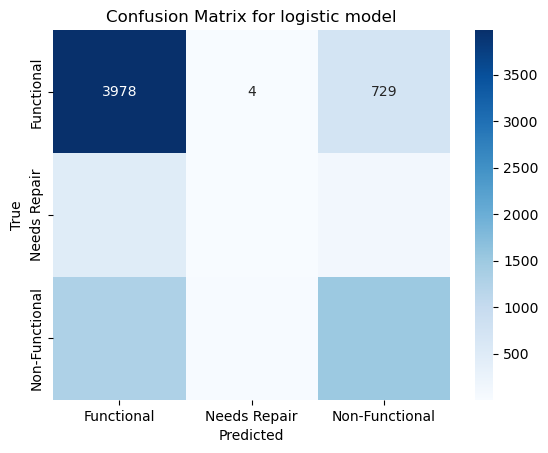

In [28]:


cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Functional', 'Needs Repair', 'Non-Functional'],
            yticklabels=['Functional', 'Needs Repair', 'Non-Functional'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for logistic model')
plt.show()

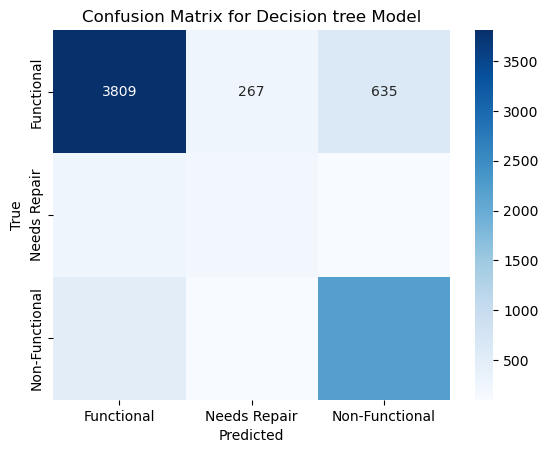

In [29]:
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Functional', 'Needs Repair', 'Non-Functional'],
            yticklabels=['Functional', 'Needs Repair', 'Non-Functional'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision tree Model')
plt.show()

#### Limitations:
- The data might be imbalanced, which could affect the performance of the classifier.
- Missing values were imputed, which might have introduced bias into the model.
- Some important features could be missing, such as real-time sensor data or seasonal information.

#### Future Work:
- Collect more data over a longer time period to improve model performance.
- Incorporate real-time monitoring for water wells, which could enable more accurate predictions.
- Experiment with more advanced machine learning algorithms, such as XGBoost or neural networks.


### Recommendation

Based on the findings and model evaluations from the Tanzania Water Wells project, the following recommendations can be made:

1. Prioritize Non-Functional Wells for Maintenance and Repair

The Decision Tree model accurately classifies non-functional wells with a recall of 78%, making it a reliable tool for identifying wells that require immediate attention. NGOs or government agencies can use this model to prioritize their resources and allocate them to the areas most in need of intervention. This will enhance efforts in providing sustainable access to clean water by ensuring non-functional wells are promptly repaired.

2. Further Investigate Wells Needing Repair

The model struggles with identifying wells that are functional but need repairs, with a precision and recall around 37%. This lower performance suggests that additional data collection or feature engineering might be needed to better understand this class. It is recommended that stakeholders investigate what additional factors might be contributing to the need for repair, such as environmental conditions, maintenance history, or usage patterns. This data could then be incorporated into future models for improved predictions.

3. Implement Predictive Maintenance Programs

Based on the models’ ability to predict well functionality, stakeholders can develop predictive maintenance programs. By monitoring wells predicted to be at risk of failure or needing repair, proactive measures can be taken to avoid costly breakdowns. This approach could minimize downtime for communities dependent on these water sources and lead to more efficient management of water resources.

4. Long-Term Policy Planning

Insights from the model can inform policy decisions, particularly regarding where to invest in new well construction or repair efforts. By analyzing which features are most influential in predicting well failures (such as pump type, installation year, and geographical location), policy makers can make data-driven decisions about future well installations and maintenance schedules.